# ML: Homework 1 - Question 5 and 6
## Arash Latifi - 810197576
### Srping 2022

---
# Q5) Football Dataset

In [51]:
import cv2
import glob
import matplotlib.pyplot as plt
import pandas as pd

In [52]:
images_c = [cv2.imread(file) for file in glob.glob('Q5_Dataset/Images/c*.jpg')]
images_m = [cv2.imread(file) for file in glob.glob('Q5_Dataset/Images/m*.jpg')]

In [53]:
print("Chelsea: " + str(len(images_c)) + "\tManchester: " + str(len(images_m)))

Chelsea: 64	Manchester: 58


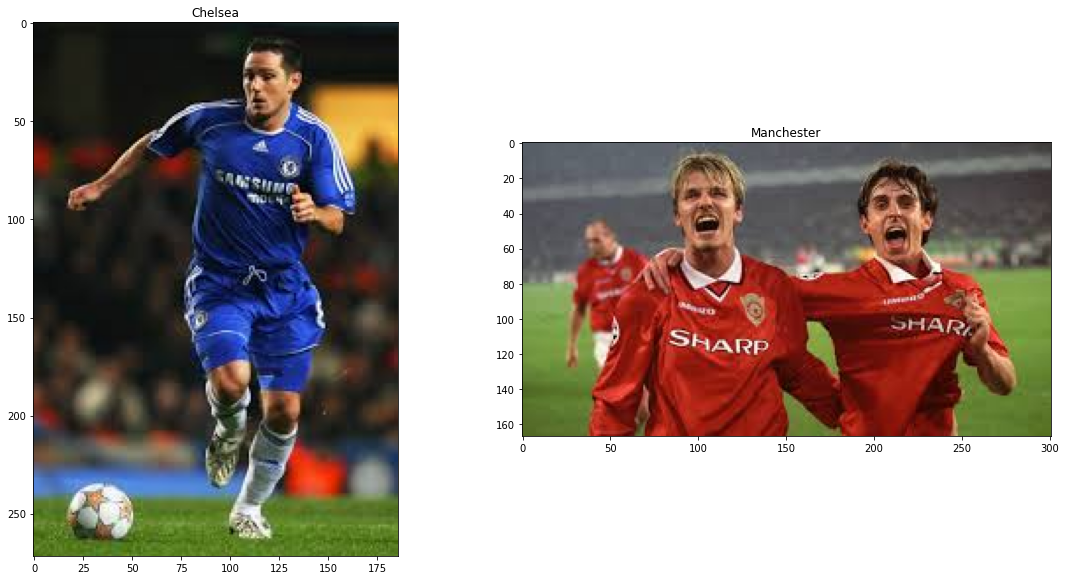

In [54]:

fig, ax = plt.subplots(1, 2, figsize=(16, 8))
fig.tight_layout()

ax[0].imshow(cv2.cvtColor(images_c[10], cv2.COLOR_BGR2RGB))
ax[0].set_title("Chelsea")
ax[1].imshow(cv2.cvtColor(images_m[10], cv2.COLOR_BGR2RGB))
ax[1].set_title("Manchester")
plt.show()

In [96]:
df = pd.DataFrame()
df['class'] = ''
df['red'] = ''
df['green'] = ''
df['blue'] = ''
for i in range(len(images_c)):
    temp = images_c[i].mean(axis=0).mean(axis=0)
    df.loc[len(df)] = [1, temp[0], temp[1], temp[2]]
for i in range(len(images_m)):
    temp = images_m[i].mean(axis=0).mean(axis=0)
    df.loc[len(df)] = [2, temp[0], temp[1], temp[2]]
df

,class,red,green,blue
0,1.0,146.868117,113.613790,99.266885
1,1.0,188.230243,172.718215,171.014902
2,1.0,50.240636,44.929975,45.925127
3,1.0,93.945119,103.768452,81.871091
4,1.0,77.863994,96.276187,95.688082
...,...,...,...,...
117,2.0,49.742772,51.836400,90.832776
118,2.0,101.093162,98.921054,164.051626
119,2.0,52.770046,78.758812,96.540052
120,2.0,71.207838,77.443221,106.566972


In [98]:
df['predicted'] = 1
df.loc[df['red'] > df['blue'], 'predicted'] = 2
df

,class,red,green,blue,predicted
0,1.0,146.868117,113.613790,99.266885,2
1,1.0,188.230243,172.718215,171.014902,2
2,1.0,50.240636,44.929975,45.925127,2
3,1.0,93.945119,103.768452,81.871091,2
4,1.0,77.863994,96.276187,95.688082,1
...,...,...,...,...,...
117,2.0,49.742772,51.836400,90.832776,1
118,2.0,101.093162,98.921054,164.051626,1
119,2.0,52.770046,78.758812,96.540052,1
120,2.0,71.207838,77.443221,106.566972,1


In [179]:
tp = len(df.loc[(df['predicted'] == 1) & (df['class'] == 1.0)])
fp = len(df.loc[(df['predicted'] == 1) & (df['class'] == 2.0)])
tn = len(df.loc[(df['predicted'] == 2) & (df['class'] == 2.0)])
fn = len(df.loc[(df['predicted'] == 2) & (df['class'] == 1.0)])

recall = tp/(tp+fn)
precision = tp/(tp+fp)
specificity = tn/(tn+fp)
negative_predictive = tn/(tn+fn)
accuracy = 2*recall*precision/(recall+precision)

In [182]:
import prettytable

x = prettytable.PrettyTable([" ", "Positive", "Negative", ""])
x.add_row(["Positive", "TP = " + str(tp), "FN = " + str(fn), "Recal = " + str(recall)])
x.add_row(["Negative", "FP = " + str(fp), "TN = " + str(tn), "Specificity = " + str(specificity)])
x.add_row(["","Precision = " + str(precision), "Neg_Pre = " + str(negative_predictive), "Accuracy = " + str(accuracy)])
x.align = "l"
print(x)

+----------+------------------+-------------------------------+------------------------------------+
|          | Positive         | Negative                      |                                    |
+----------+------------------+-------------------------------+------------------------------------+
| Positive | TP = 18          | FN = 46                       | Recal = 0.28125                    |
| Negative | FP = 57          | TN = 1                        | Specificity = 0.017241379310344827 |
|          | Precision = 0.24 | Neg_Pre = 0.02127659574468085 | Accuracy = 0.2589928057553957      |
+----------+------------------+-------------------------------+------------------------------------+


---
# Q6) Iris Dataset

## Data Preprocessing

In [10]:
import numpy as np
import pandas as pd

In [11]:
from sklearn import datasets

iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)  
df['target'] = iris.target

In [12]:
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
train = df.sample(frac = 0.7, random_state = 1)
test = df.drop(train.index)

y_train = train["target"]
x_train = train.drop("target", axis = 1)

y_test = test["target"]
x_test = test.drop("target", axis = 1)

## Model Training


In [14]:
means = train.groupby(["target"]).mean()
var = train.groupby(["target"]).var()
prior = (train.groupby("target").count() / len(train)).iloc[:,1]
classes = np.unique(train["target"].tolist())

## Classification

In [16]:
def Normal(x, mu, var):
    '''
        Function to return pdf of Normal(mu, var) evaluated at x
    '''
    sd = np.sqrt(var)
    pdf = (np.e ** (-0.5 * ((x - mu)/sd) ** 2)) / (sd * np.sqrt(2 * np.pi))
    
    return pdf

In [17]:
def Predict(X):
    Predictions = []
    
    for i in X.index: # Loop through each instances
        
        ClassLikelihood = []
        instance = X.loc[i]
        
        for cls in classes: # Loop through each class
            
            FeatureLikelihoods = []
            FeatureLikelihoods.append(np.log(prior[cls])) # Append log prior of class 'cls'
            
            for col in x_train.columns: # Loop through each feature
                
                data = instance[col]
                
                mean = means[col].loc[cls] # Find the mean of column 'col' that are in class 'cls'
                variance = var[col].loc[cls] # Find the variance of column 'col' that are in class 'cls'
                
                Likelihood = Normal(data, mean, variance)
                
                if Likelihood != 0:
                    Likelihood = np.log(Likelihood) # Find the log-likelihood evaluated at x
                else:
                    Likelihood = 1/len(train) 
                
                FeatureLikelihoods.append(Likelihood)
                
            TotalLikelihood = sum(FeatureLikelihoods) # Calculate posterior
            ClassLikelihood.append(TotalLikelihood)
            
        MaxIndex = ClassLikelihood.index(max(ClassLikelihood)) # Find largest posterior position
        Prediction = classes[MaxIndex]
        Predictions.append(Prediction)
        
    return Predictions

In [34]:
PredictTrain = Predict(x_train)
PredictTest = Predict(x_test)

## Performance

In [35]:
def Accuracy(y, prediction):
    
    # Function to calculate accuracy
    y = list(y)
    prediction = list(prediction)
    score = 0
    
    for i, j in zip(y, prediction):
        if i == j:
            score += 1
            
    return score / len(y)

In [36]:
print("Train: ", Accuracy(y_train, PredictTrain))
print("Test:  ", Accuracy(y_test, PredictTest))

Train:  0.9809523809523809
Test:   0.9111111111111111


## Comparison with SKlearn

In [37]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB() # Gaussian Naïve Bayes assumes gaussian data
clf.fit(x_train, y_train)
SkTrain = clf.predict(x_train) # Predicting on the train set
SkTest = clf.predict(x_test) # Predicting on the test set

In [38]:
print("Sk_Train: ", Accuracy(PredictTrain, SkTrain))
print("Sk_Test:  ", Accuracy(PredictTest, SkTest))


Sk_Train:  1.0
Sk_Test:   1.0
